In [1]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris=sns.load_dataset('iris') #since it is a popular dataset no need to load from outside
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
#View the info of the data frame that contains details like the count of non-null variables and the column’s datatype along with the column names. 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#statistical summary
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='count', ylabel='species'>

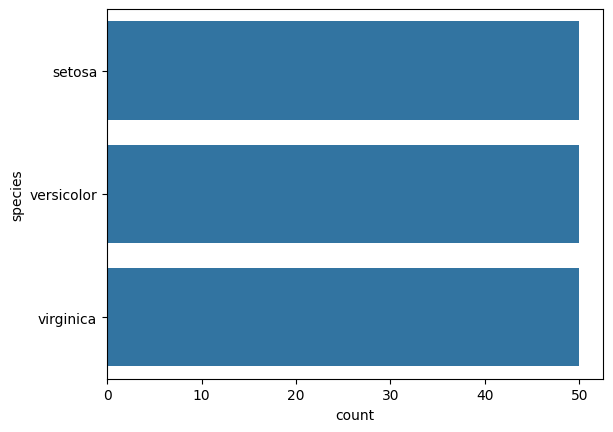

In [5]:
#view the countplot of species
iris['species'].value_counts()
sns.countplot(iris['species'])

In [6]:
#deciding x and y variables based on whether they are dependent or indepedent
X=iris.iloc[:,:4]
y=iris.iloc[:,4]

In [7]:
#X_values
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
#y_values
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

### Create and Train the Model

In [9]:
#creating a model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [10]:
#splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [12]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (90, 4)
Shape of X_test: (60, 4)
Shape of y_train: (90,)
Shape of y_test: (60,)


In [13]:
#fitting the model
model.fit(X_train,y_train)


LogisticRegression()

In [14]:
y_pred=model.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [16]:
score=model.score(X_test,y_test)
score

0.9833333333333333

In [17]:
#predict the outputs for the first five samples 
model.predict(X[0:5])

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [18]:
y_pred[0:5]

array(['virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [19]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[20,  0,  0],
       [ 0, 23,  1],
       [ 0,  0, 16]], dtype=int64)

##### Each row of the matrix represents the actual class

##### Each column represents the predicted class

##### The element in the ith row and jth column of the matrix represents the number of instances of the actual class i that were predicted as class j.

There is 98% accuracy

Text(95.72222222222221, 0.5, 'Truth')

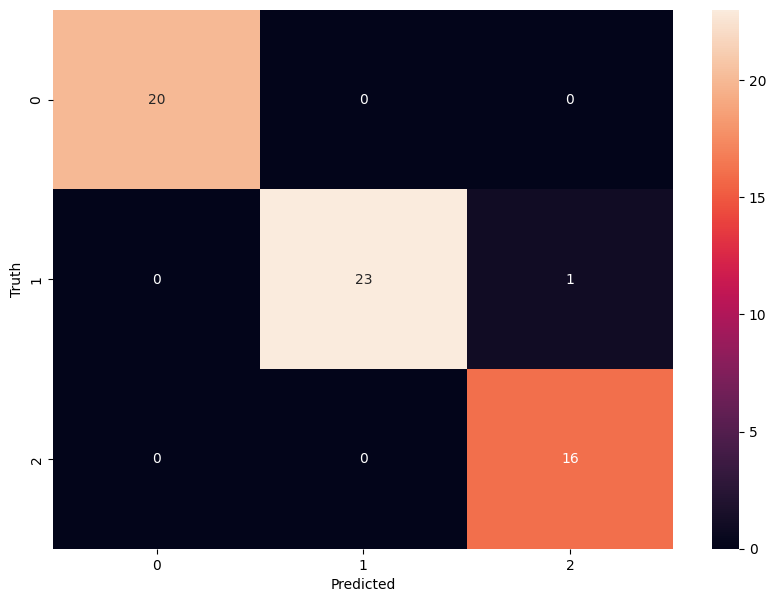

In [20]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

The actual species versicolour is predicted 19 times as it is and 1 as wrong prediction

#### GridSearchCV
Grid search is a technique that exhaustively searches through a specified subset of hyperparameter combinations. It creates a grid of all possible hyperparameter values and evaluates the model performance using cross-validation for each combination. This is beneficial for pre-pruning because you can specify a grid of hyperparameters related to pre-pruning constraints . By evaluating the model's performance across various combinations of these parameters, you can determine the optimal settings that prevent overfitting and maximize predictive accuracy.

In [28]:
parameter={
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
model1=LogisticRegression(max_iter=1000,solver='saga')

In [29]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(model1,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)

C:\Users\naufg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\naufg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\naufg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\naufg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\naufg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [30]:
cv.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'saga'}

In [32]:
model1.fit(X_train,y_train)


C:\Users\naufg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

In [33]:
y_pred1=model1.predict(X_test)

In [34]:
print(accuracy_score(y_pred1,y_test))

0.9833333333333333


In [2]:
#98% accurate model